In [19]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [63]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange
import progressbar

SELECT_NUMBER = 1000

random.seed(1)
np_cpu = np.load("wetransfer-2ee104//google-cpu-full.npy")
df_cpu = pd.DataFrame(np_cpu).transpose()

# All Correlation

In [ ]:
# # uncomment to generate all_cpu_correlation.csv
# # all_cpu_correlation is a dataframe with the correlation of all the machines with T = 8350

# # computing the correlation between all machines and saving to a csv
# all_cpu_correlation = df_cpu.corr()
# all_cpu_correlation.to_csv("all_cpu_correlation.csv")
# all_cpu_correlation = all_cpu_correlation.abs()
# all_cpu_correlation

In [21]:
# loading correlation matrix from csv
all_cpu_correlation = pd.read_csv('all_cpu_correlation.csv')

column_name_map = {}
for x in range (0,12476):
    column_name_map[str(x)]= x
    
all_cpu_correlation = all_cpu_correlation.drop(["Unnamed: 0"], axis = 1)

# Note that we take the absolute value
all_cpu_correlation = all_cpu_correlation.rename(columns = column_name_map).abs()
all_cpu_correlation

,0,1,2,3,4,5,6,7,8,9,...,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475
0,1.000000,0.182548,0.293396,0.147556,0.371543,0.434098,0.198072,0.413441,0.296714,0.489531,...,0.013233,0.337846,0.506589,0.326902,0.361901,0.531176,0.364277,0.303356,0.061162,0.363819
1,0.182548,1.000000,0.243375,0.189525,0.006541,0.171590,0.244268,0.087363,0.352426,0.361932,...,0.155401,0.136400,0.145904,0.137189,0.287106,0.303303,0.174202,0.118051,0.196405,0.302263
2,0.293396,0.243375,1.000000,0.140648,0.112303,0.053745,0.186293,0.054868,0.186472,0.278411,...,0.026876,0.125050,0.115339,0.140605,0.198736,0.316958,0.217808,0.068587,0.011677,0.156072
3,0.147556,0.189525,0.140648,1.000000,0.058056,0.253711,0.241811,0.251068,0.339572,0.300277,...,0.232102,0.131432,0.212682,0.250599,0.263887,0.247532,0.298648,0.241237,0.212015,0.180568
4,0.371543,0.006541,0.112303,0.058056,1.000000,0.014277,0.045071,0.115329,0.105065,0.121746,...,0.329945,0.003419,0.198718,0.068762,0.084708,0.264060,0.211030,0.151725,0.326329,0.050278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12471,0.531176,0.303303,0.316958,0.247532,0.264060,0.408752,0.334992,0.431348,0.417225,0.535413,...,0.240960,0.273504,0.496323,0.345101,0.502203,1.000000,0.445638,0.316005,0.106159,0.409110
12472,0.364277,0.174202,0.217808,0.298648,0.211030,0.260090,0.144117,0.277020,0.254723,0.344410,...,0.029994,0.169839,0.366731,0.100655,0.339365,0.445638,1.000000,0.164062,0.050031,0.275456
12473,0.303356,0.118051,0.068587,0.241237,0.151725,0.477328,0.258073,0.400237,0.392263,0.392945,...,0.408976,0.394879,0.422945,0.379233,0.305568,0.316005,0.164062,1.000000,0.326421,0.262081
12474,0.061162,0.196405,0.011677,0.212015,0.326329,0.185391,0.253849,0.212569,0.326837,0.271802,...,0.430247,0.196720,0.148528,0.163455,0.279633,0.106159,0.050031,0.326421,1.000000,0.105131


In [22]:
# # uncomment to generate all_correlation_series.csv
# all_correlation_ls = all_cpu_correlation.stack().values

# # we ignore the 1s because they are self-correlation
# all_correlation_ls =  [x for x in all_correlation_ls if x != 1]

# # correlation_series is a pd.series with all the correlation between all machines in a list
# # it should have a length of 12476 * 12475 = 155638100
# correlation_series = pd.Series(all_correlation_ls)
# correlation_series.to_csv("all_correlation_series.csv")

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [56]:
# loading correlation_series from csv

# correlation_series is a pd.series with all the correlation between all machines in a list
# it should have a length of 12476 * 12475 = 155638100
correlation_series = pd.read_csv("all_correlation_series.csv", header = None)[1]
correlation_series

0            0.182548
1            0.293396
2            0.147556
3            0.371543
4            0.434098
               ...   
155638095    0.342955
155638096    0.409110
155638097    0.275456
155638098    0.262081
155638099    0.105131
Name: 1, Length: 155638100, dtype: float64

Text(0, 0.5, 'Number of Occurences')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


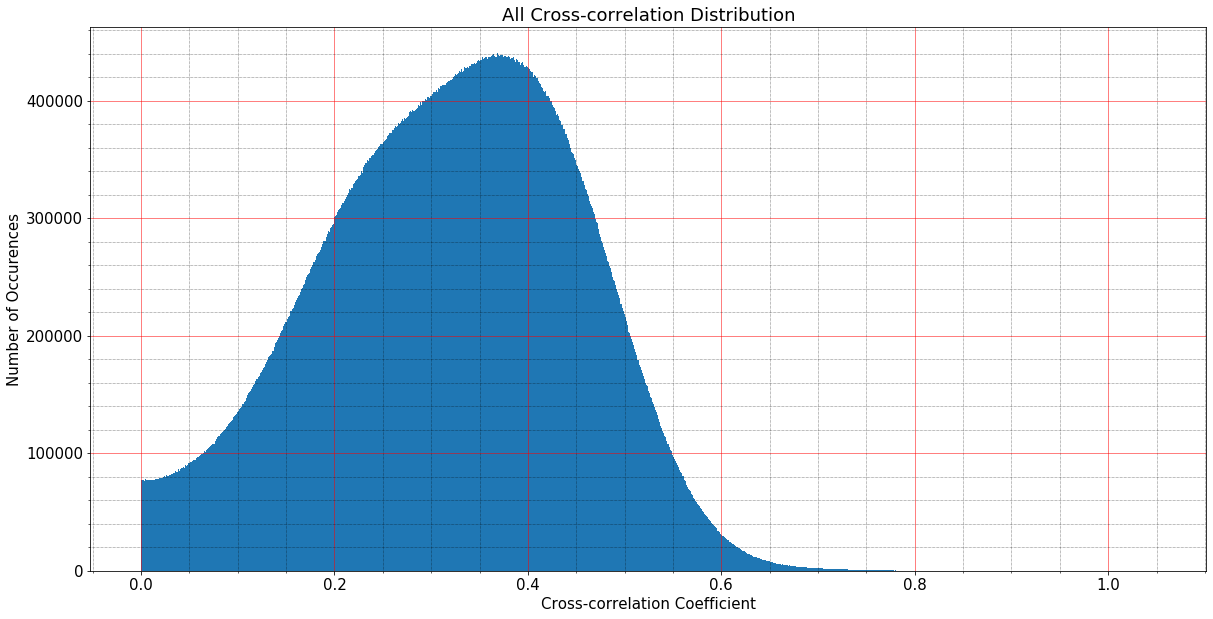

In [24]:
# plotting the distribution of the all the correlation

plt.figure(figsize=(20,10))
binning = np.arange(0, 1.05, 0.001).tolist()
value_of_each_bin = plt.hist(correlation_series, bins = binning)
plt.minorticks_on()
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("All Cross-correlation Distribution")
plt.xlabel("Cross-correlation Coefficient")
plt.ylabel("Number of Occurences")
# plt.savefig("All_Cross-correlation_Distribution")

In [25]:
# look for the 90th percentile

percentile_95 = np.percentile(correlation_series.tolist(), 99.9)
max_correlation = pd.read_csv("df_max_correlation.csv", header = None)[1]
selected_machines_ls = []

for index, x in enumerate(max_correlation):
    if x > percentile_95:
        selected_machines_ls.append(index)

In [26]:
print("Mean of all correlation: ", np.mean(correlation_series))
print("% of all correlation has a correlation coefficient of > 0.7")

Mean of all correlation:  0.3183272494564083
% of all correlation has a correlation coefficient of > 0.7


# Maximum Correlation

In [29]:
# uncomment this block to generate df_max_correlation.csv

# we would like to get the largest correlation for each of the machines
# note that we use the 2nd largest correlation as the largest correlation is 1 which is the correlation with itself

# def second_largest_number(list1):
#     k=max(list1[0],list1[1]) 
#     secondmax=min(list1[0],list1[1]) 

#     for i in range(2,len(list1)): 
#         if list1[i]>k: 
#             secondmax=k
#             k=list1[i] 
#         else: 
#             if list1[i]>secondmax: 
#                 secondmax=list1[i]
#     return secondmax            

# with progressbar.ProgressBar(max_value = len(all_cpu_correlation)) as bar:
#     for index,x in enumerate(all_cpu_correlation):
#         bar.update(index)
#         map_max_correlation[x] = second_largest_number(all_cpu_correlation[x])
    
# df_max_correlation = pd.Series(map_max_correlation)    
# df_max_correlation.to_csv("df_max_correlation.csv")
# df_max_correlation

In [30]:
# loading max correlation matrix from csv
df_max_correlation = pd.read_csv('df_max_correlation.csv', header = None)[1]

Text(0, 0.5, 'Number of Occuerences')

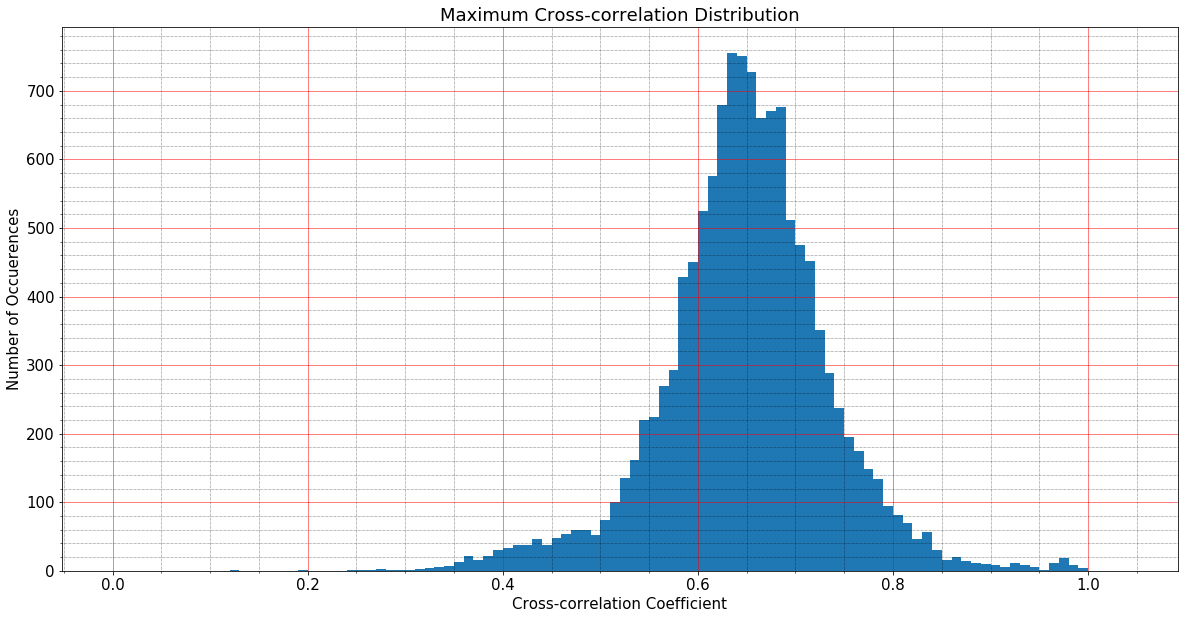

In [31]:
# plotting the distribution of the maximum correlation

plt.figure(figsize=(20,10))
binning = np.arange(0, 1.05, 0.01).tolist()
value_of_each_bin = plt.hist(df_max_correlation, bins = binning)
plt.minorticks_on()
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}
plt.rc('font', **font)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Maximum Cross-correlation Distribution")
plt.xlabel("Cross-correlation Coefficient")
plt.ylabel("Number of Occuerences")
# plt.savefig("Maximum_Cross-correlation_Distribution")

# Selecting Machines

In [106]:
# select last 10% of max correlation
updated_selected_machines = df_max_correlation.sort_values().iloc[-int(len(df_max_correlation)*0.1):]
updated_selected_machines

9604    0.748106
4451    0.748113
8736    0.748144
6997    0.748154
9918    0.748165
          ...   
8163    0.982081
3911    0.994134
9959    0.996148
4336    0.997112
9629    0.997112
Name: 1, Length: 1247, dtype: float64

In [107]:
# take away machines with corrupted data
# rejected_machines are machines with only 0 as values for samples 23*288:23*288+5
rejected_machines = df_cpu[updated_selected_machines.index].iloc[23*288:23*288+5].abs().sum().sort_values().iloc[:23]
rejected_machines

8765     0.0
924      0.0
8688     0.0
1280     0.0
5324     0.0
5090     0.0
7692     0.0
1302     0.0
3857     0.0
9774     0.0
8763     0.0
5430     0.0
10155    0.0
5012     0.0
1478     0.0
9659     0.0
6630     0.0
5074     0.0
5784     0.0
4922     0.0
5506     0.0
10182    0.0
10518    0.0
dtype: float64

In [108]:
# dropping rejected machines

updated_selected_machines = updated_selected_machines.drop(rejected_machines.index)
updated_selected_machines

9604    0.748106
4451    0.748113
8736    0.748144
6997    0.748154
9918    0.748165
          ...   
8163    0.982081
3911    0.994134
9959    0.996148
4336    0.997112
9629    0.997112
Name: 1, Length: 1224, dtype: float64

In [115]:
# drop machines with max_correlation lower than threshold

threshold = 0.75
lower_threshold = updated_selected_machines.loc[updated_selected_machines < threshold].index
updated_selected_machines = updated_selected_machines.drop(lower_threshold)
updated_selected_machines

7341    0.750096
7679    0.750105
9194    0.750122
2094    0.750173
9515    0.750175
          ...   
8163    0.982081
3911    0.994134
9959    0.996148
4336    0.997112
9629    0.997112
Name: 1, Length: 1162, dtype: float64

In [125]:
# write to csv

pd.Series(sorted(updated_selected_machines.index)).to_csv("df_updated_selected_machines.csv")

/Users/yeehonglow/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [126]:
# to read updated_selected_machines from csv, copy the following code

updated = pd.read_csv("df_updated_selected_machines.csv", header = None)[1]
updated

0           0
1          22
2          30
3          76
4         100
        ...  
1157    12430
1158    12435
1159    12448
1160    12450
1161    12462
Name: 1, Length: 1162, dtype: int64